# Research Question


### (1) What factors most influence the final sale price of houses in urban areas, and can these factors be used to predict the price of a house in a specific neighborhood?

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

## Inspect Data

In [63]:
house_prices = pd.read_csv('train.csv')
print(house_prices.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Identify Numeric Features (4)

In [64]:
numeric_features = house_prices.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Features:", numeric_features)

Numeric Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


## Feature Engineering (5)

In [112]:
relevant_features = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal','Neighborhood'
]

In [123]:
#relevant features from the original dataframe
df_selected = house_prices[relevant_features + ['Neighborhood']]

# Encoding for the 'Neighborhood' feature
df_encoded = pd.get_dummies(df_selected, columns=['Neighborhood'], drop_first=True)

print(df_encoded.head())

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  Neighborhood_NoRidge  \
0       196.0         706           0        150  ...                 False   
1         0.0         978           0        284  ...                 False   
2       162.0         486           0        434  ...                 False   
3         0.0         216           0        540  ...                 False   
4       350.0         655           0        490  ...                  True   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborh

## Visuzalize Sale Price, checking for Outliers, log transforming data

In [124]:
y = house_prices['SalePrice']

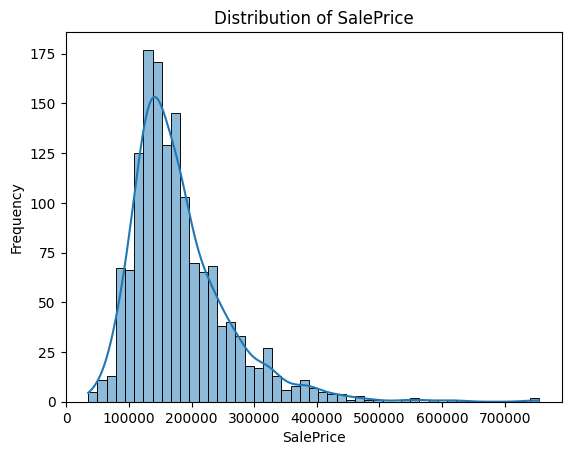

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

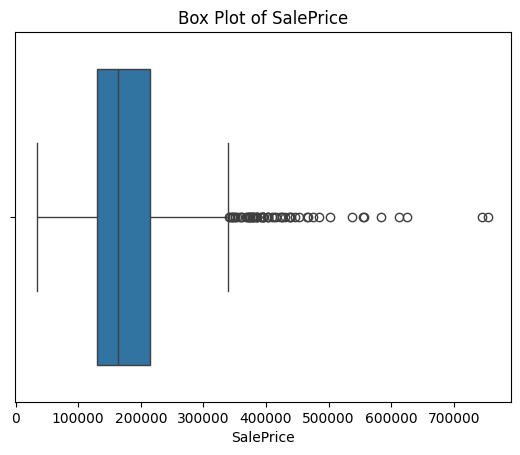

In [126]:
sns.boxplot(x=y)
plt.title("Box Plot of SalePrice")
plt.show()

In [129]:
# log transform data
y_log = np.log1p(y)

## Prepare data

In [145]:
X = df_encoded
y = y_log 

In [146]:
#Identify missing Values
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [147]:
# Drop Missing Values
X = X.dropna()
y = y[X.index]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing our Regression Model

In [149]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [152]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.092290254332102
MSE: 0.015310906445404171
R²: 0.892315966336051


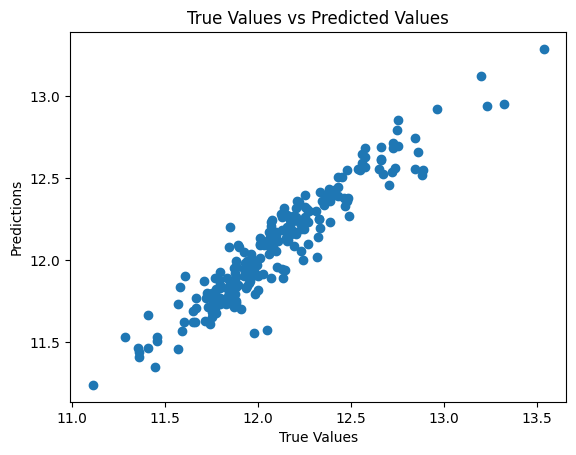

In [154]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predicted Values')
plt.show()

## Find out which features influence the final sales price

In [163]:
feature_names = X.columns
coefficients = model.coef_

In [164]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [165]:
feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

### Interpretation
Features with larger absolute coefficients 
(either positive or negative) have a stronger influence on the SalePrice.

In [166]:
print(feature_importance)

                 Feature   Coefficient  Absolute_Coefficient
20          KitchenAbvGr -1.538526e-01          1.538526e-01
47  Neighborhood_NridgHt  1.027545e-01          1.027545e-01
71  Neighborhood_NridgHt  1.027545e-01          1.027545e-01
53  Neighborhood_StoneBr  9.938559e-02          9.938559e-02
77  Neighborhood_StoneBr  9.938559e-02          9.938559e-02
..                   ...           ...                   ...
9              BsmtUnfSF -1.423369e-05          1.423369e-05
31               MiscVal -6.844308e-06          6.844308e-06
7             BsmtFinSF1  6.719186e-06          6.719186e-06
1                LotArea  1.203362e-06          1.203362e-06
12              2ndFlrSF  6.637000e-07          6.637000e-07

[80 rows x 3 columns]


In [167]:
# Filter out features that do not start with 'Neighborhood_'
filtered_feature_importance = feature_importance[~feature_importance['Feature'].str.startswith('Neighborhood_')]

# Separate DataFrame for Neighborhood-specific features if needed
neighborhood_feature_importance = feature_importance[feature_importance['Feature'].str.startswith('Neighborhood_')]

# Display both filtered DataFrames
print("Filtered Feature Importance (without Neighborhood_ features):")
print(filtered_feature_importance)

print("\nNeighborhood Feature Importance:")
print(neighborhood_feature_importance)

Filtered Feature Importance (without Neighborhood_ features):
          Feature   Coefficient  Absolute_Coefficient
20   KitchenAbvGr -1.538526e-01          1.538526e-01
24     GarageCars  6.624626e-02          6.624626e-02
2     OverallQual  6.450992e-02          6.450992e-02
15   BsmtFullBath  5.942975e-02          5.942975e-02
17       FullBath  5.308437e-02          5.308437e-02
3     OverallCond  5.188349e-02          5.188349e-02
18       HalfBath  3.710939e-02          3.710939e-02
22     Fireplaces  3.159544e-02          3.159544e-02
16   BsmtHalfBath  2.000229e-02          2.000229e-02
21   TotRmsAbvGrd  1.559316e-02          1.559316e-02
19   BedroomAbvGr  4.735397e-03          4.735397e-03
4       YearBuilt  2.060585e-03          2.060585e-03
30       PoolArea -5.579847e-04          5.579847e-04
5    YearRemodAdd  4.183967e-04          4.183967e-04
29    ScreenPorch  3.681623e-04          3.681623e-04
23    GarageYrBlt  3.362796e-04          3.362796e-04
0     LotFrontage  2

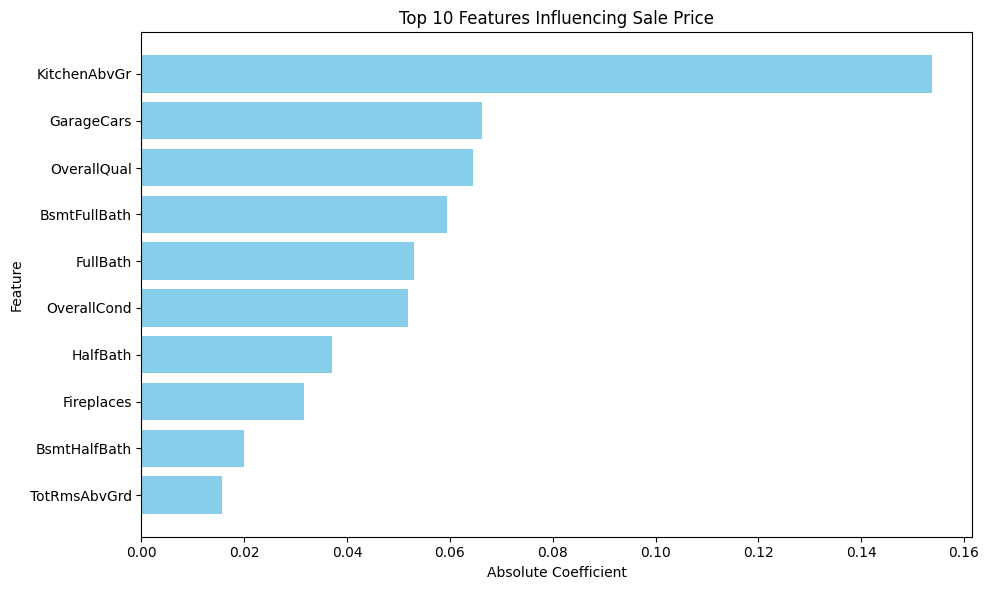

In [171]:
## visualize
top_n = 10  # Change this to 5 for the top 5 features
top_features = filtered_feature_importance.head(top_n)

# Plot
plt.figure(figsize=(10, 6))  # Adjust size for better visualization
plt.barh(top_features['Feature'], top_features['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features Influencing Sale Price')
plt.gca().invert_yaxis()  # Largest on top
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()